In [4]:
import pandas as pd
import numpy as np
import datetime

In [5]:
df = pd.read_csv('../data/서울시 코로나19 확진자 현황.csv', encoding='utf8', sep=',')

In [6]:
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,125533,2021-11-06,NaN,NaN,NaN,강서구,NaN,감염경로 조사중,NaN,-,NaN,2021-11-07 10:55:03,2021-11-07 10:55:03,Y
1,125532,2021-11-06,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-11-07 10:55:03,2021-11-07 10:55:03,Y
2,125531,2021-11-06,NaN,NaN,NaN,강동구,NaN,강동구 소재 유치원 관련,NaN,-,NaN,2021-11-07 10:55:03,2021-11-07 10:55:03,Y
3,125530,2021-11-06,NaN,NaN,NaN,노원구,NaN,노원구 소재 병원 관련 21.10.(2),NaN,-,NaN,2021-11-07 10:55:03,2021-11-07 10:55:03,Y
4,125529,2021-11-06,NaN,NaN,NaN,금천구,NaN,감염경로 조사중,NaN,-,NaN,2021-11-07 10:55:03,2021-11-07 10:55:03,Y


# [연도별, 분기별, 지역]으로 df 재생성

In [7]:
df['확진일']= pd.to_datetime(df['확진일'])  # 형 변환 : String -> datetime

df['연도별'] = df['확진일'].dt.year 
df['분기별'] = df['확진일'].dt.quarter

In [8]:
df = df.loc[:, ['연도별', '분기별', '지역']]

In [9]:
df

,연도별,분기별,지역
0,2021,4,강서구
1,2021,4,성북구
2,2021,4,강동구
3,2021,4,노원구
4,2021,4,금천구
...,...,...,...
125528,2020,1,성북구
125529,2020,1,마포구
125530,2020,1,종로구
125531,2020,1,중랑구


In [10]:
df['지역'].unique()

array(['강서구', '성북구', '강동구', '노원구', '금천구', '관악구', '은평구', '서초구', '강북구',
       '구로구', '송파구', '광진구', '동대문구', '영등포구', '타시도', '종로구', '양천구', '용산구',
       '강남구', '서대문구', '중랑구', '도봉구', '동작구', '중구', '마포구', '성동구', '기타'],
      dtype=object)

In [11]:
len(df['지역'].unique())

27

연도별 데이터확인

In [12]:
df['연도별'].unique()

array([2021, 2020])

연도와 분기를 합친 컬럼 생성

In [13]:
df['연도별분기'] = df['연도별'].apply(str) + "-" + df['분기별'].apply(str)

In [14]:
df=df.drop(['연도별','분기별'], axis=1)

In [15]:
df

,지역,연도별분기
0,강서구,2021-4
1,성북구,2021-4
2,강동구,2021-4
3,노원구,2021-4
4,금천구,2021-4
...,...,...
125528,성북구,2020-1
125529,마포구,2020-1
125530,종로구,2020-1
125531,중랑구,2020-1


In [16]:
df['연도별분기'].unique()

array(['2021-4', '2021-3', '2021-2', '2021-1', '2020-4', '2020-3',
       '2020-2', '2020-1'], dtype=object)

분기별로 짤라내기

In [17]:
twenty_1 = df['연도별분기'] == '2020-1'
twenty_2 = df['연도별분기'] == '2020-2'
twenty_3 = df['연도별분기'] == '2020-3'
twenty_4 = df['연도별분기'] == '2020-4'
twenty_one_1 = df['연도별분기'] == '2021-1'
twenty_one_2 = df['연도별분기'] == '2021-2'
twenty_one_3 = df['연도별분기'] == '2021-3'
twenty_one_4 = df['연도별분기'] == '2021-4'

In [18]:
twenty_1_pd = df[twenty_1]
twenty_2_pd = df[twenty_2]
twenty_3_pd = df[twenty_3]
twenty_4_pd = df[twenty_4]
twenty_one_1_pd = df[twenty_one_1]
twenty_one_2_pd = df[twenty_one_2]
twenty_one_3_pd = df[twenty_one_3]
twenty_one_4_pd = df[twenty_one_4]

In [19]:
twenty_1_pd

,지역,연도별분기
125055,종로구,2020-1
125056,타시도,2020-1
125057,중구,2020-1
125058,양천구,2020-1
125059,타시도,2020-1
...,...,...
125528,성북구,2020-1
125529,마포구,2020-1
125530,종로구,2020-1
125531,중랑구,2020-1


분기마다 확진자 수 파악

In [20]:
twenty_1_loc = twenty_1_pd.groupby(['지역']).count()
twenty_2_loc = twenty_2_pd.groupby(['지역']).count()
twenty_3_loc = twenty_3_pd.groupby(['지역']).count()
twenty_4_loc = twenty_4_pd.groupby(['지역']).count()
twenty_one_1_loc = twenty_one_1_pd.groupby(['지역']).count()
twenty_one_2_loc = twenty_one_2_pd.groupby(['지역']).count()
twenty_one_3_loc = twenty_one_3_pd.groupby(['지역']).count()
twenty_one_4_loc = twenty_one_4_pd.groupby(['지역']).count()


위에서 만든 데이터프레임 다합치기

In [21]:
result=pd.merge(left=twenty_1_loc, right =twenty_2_loc, how ='inner', on = '지역')
result=pd.merge(left=result, right = twenty_3_loc, how='inner', on = '지역')
result=pd.merge(left=result, right = twenty_4_loc, how='inner', on = '지역')
result=pd.merge(left=result, right = twenty_one_1_loc, how='inner', on = '지역')
result=pd.merge(left=result, right = twenty_one_2_loc, how='inner', on = '지역')
result=pd.merge(left=result, right = twenty_one_3_loc, how='inner', on = '지역')
result=pd.merge(left=result, right = twenty_one_4_loc, how='inner', on = '지역')

/var/folders/4q/c6yx58d93tb100yvtxhzm8kr0000gn/T/ipykernel_7388/3297797665.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'연도별분기_x'} in the result is deprecated and will raise a MergeError in a future version.
  result=pd.merge(left=result, right = twenty_4_loc, how='inner', on = '지역')
/var/folders/4q/c6yx58d93tb100yvtxhzm8kr0000gn/T/ipykernel_7388/3297797665.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'연도별분기_x'} in the result is deprecated and will raise a MergeError in a future version.
  result=pd.merge(left=result, right = twenty_one_2_loc, how='inner', on = '지역')
/var/folders/4q/c6yx58d93tb100yvtxhzm8kr0000gn/T/ipykernel_7388/3297797665.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'연도별분기_x'} in the result is deprecated and will raise a MergeError in a future version.
  result=pd.merge(left=result, right = twenty_one_4_loc, how='inner', on = '지역')


컬럼 재정렬

In [22]:
result.columns = ['2020-1','2020-2','2020-3','2020-4','2021-1','2021-2','2021-3','2021-4']

In [23]:
result

,2020-1,2020-2,2020-3,2020-4,2021-1,2021-2,2021-3,2021-4
지역,,,,,,,,
강남구,41,42,187,665,585,1749,3760,1075
강동구,10,25,150,397,592,851,1863,1185
강북구,5,19,120,301,423,563,1249,822
강서구,22,56,207,1054,444,619,2122,962
관악구,34,83,268,632,473,807,3198,1119
광진구,6,11,113,331,528,689,1890,616
구로구,34,52,97,441,544,485,2619,1920
금천구,12,20,61,233,167,333,1303,884
기타,3,8,74,1309,641,86,265,248


시각화를 위해 행열 바꿈

In [40]:
result=result.transpose()

In [41]:
result

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
2020-1,41,10,5,22,34,6,34,12,3,20,...,15,27,18,19,12,21,15,5,13,29
2020-2,42,25,19,56,83,11,52,20,8,24,...,18,28,52,44,38,32,7,7,20,42
2020-3,187,150,120,207,268,113,97,61,74,258,...,301,284,110,127,73,198,66,46,155,241
2020-4,665,397,301,1054,632,331,441,233,1309,511,...,478,780,548,504,295,535,316,225,614,598
2021-1,585,592,423,444,473,528,544,167,641,613,...,554,658,479,485,473,581,217,242,567,623
2021-2,1749,851,563,619,807,689,485,333,86,852,...,705,1251,522,717,519,774,202,223,793,823
2021-3,3760,1863,1249,2122,3198,1890,2619,1303,265,1695,...,1787,3458,1621,2637,1338,2202,843,1005,1618,2425
2021-4,1075,1185,822,962,1119,616,1920,884,248,1060,...,1121,1315,690,1349,517,956,568,443,795,1345


한글깨짐 폰트변경

In [71]:
import matplotlib
import matplotlib.pyplot as plt

import platform
print(platform.system()) 
# 플랫폼 확인 # Window 
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac 
    matplotlib.rc('font', family='AppleGothic') 
else: #linux
    matplotlib.rc('font', family='NanumGothic') # 그래프에 마이너스 표시가 되도록 변경
    matplotlib.rcParams['axes.unicode_minus'] = False



Darwin


만약 지역구를 선택사항으로 요청받을시
location = list((input().split())
location을 y축에 넣어준다

- y축 로그 스케일 사용 : logy
- y축 최대, 최소 설정 : ylim -> 따로 설정안함
- 그래프 그리드 생성 : grid
- x, y 축 이름 표시 : xlabel, ylabel
- 그래프 전체 크기설정 : figsize
- 마커 표시 및 마커 크기 서정: marker, ms

<BarContainer object of 8 artists>

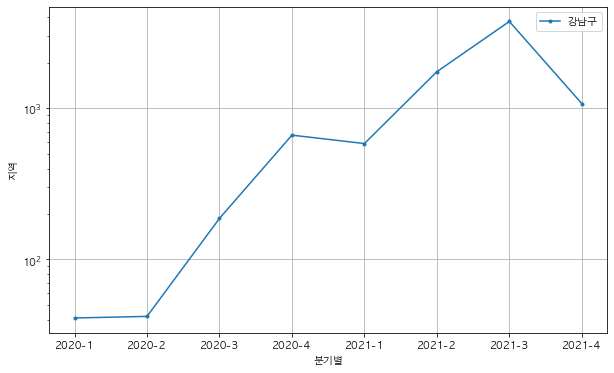

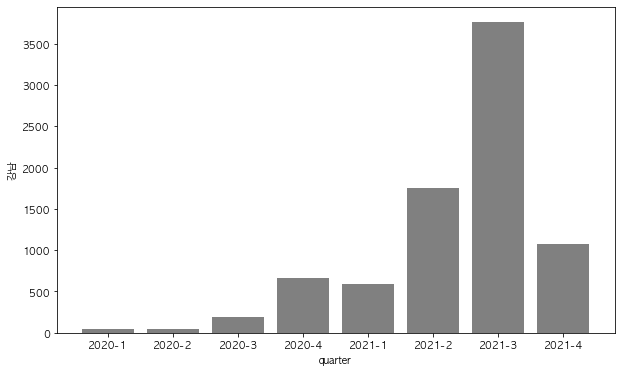

In [97]:
result.plot(y=['강남구'], logy = True,figsize=(10,6),grid=True, xlabel='분기별',ylabel='지역',marker='o',ms =3)
plt.legend()
xs = result.index.to_list()
ys = result['강남구'].to_list()
plt.figure(figsize=(10,6))
plt.xlabel('quarter')
plt.ylabel('강남')
plt.bar(xs,ys,width=0.8, color='grey')


 location = input()

## 연도별 / 분기별 / 지역 중 일부만 입력하고 검색 눌렀을 때 그것만 나오는 코드 필요

```python
if 조건 한 가지만 선택 후 검색 누르면:
    바로 검색 ( 다른 값은 기본값으로 전부 나오게 해야함. 기본값으로 전부 선택하는 설정 필요 )
elif 두 가지 조건 선택 후 검색:
    남은 한 가지 기본값=전체 출력으로 설정
else:
    모든 조건으로 출력
```

## 조건 입력하기 : 콤보 박스 연결

In [ ]:
year = df['연도별'] == int(input())   # '년도 입력(2020년부터 입력 가능)'
quarter = df['분기별'] == int(input())   # '분기 입력(1~4 중 하나 입력)'
region = df['지역'] == input()

## 1. 하나만  선택시

In [ ]:
only_year = df[year].value_counts()
only_quarter = df[quarter].value_counts()
only_region = df[region].value_counts()

## 2. 조건 2개 선택시

In [ ]:
# 연도별 + 분기별
year_quarter = df[year & quarter].value_counts()

# 연도별 + 지역별
year_region = df[year & region].value_counts()

# 분기별 + 지역별
quarter_region = df[quarter & region].value_counts()

## 3. 연도별 + 분기별 + 지역별 셋 다 선택시

In [ ]:
all_condition = df[year & quarter & region].value_counts()

In [ ]:
# 조건 한 가지 선택
only_year = df[(df['연도별'] == int(input()))].value_counts()
only_quarter = df[(df['분기별'] == int(input()))].value_counts()
only_region = df[(df['지역'] == input())].value_counts()

# 조건 두 가지 선택
## 연도별 + 분기별
year_quarter = df[(df['연도별'] == int(input())) & (df['분기별'] == int(input()))].value_counts()
## 연도별 + 지역별
year_region = df[(df['연도별'] == int(input())) & (df['지역'] == input())].value_counts()
## 분기별 + 지역별
quarter_region = df[(df['분기별'] == int(input())) & (df['지역'] == input())].value_counts()

# 조건 세 가지 선택
all_condition = df[(df['연도별'] == int(input())) & (df['분기별'] == int(input())) & (df['지역'] == input())].value_counts()